In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
data = pd.read_csv('Credit Card Transactions.csv')

In [3]:
# Shape of data
data.shape

(5000, 23)

In [4]:
# list of columns
data.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')

In [5]:
# Describe dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

In [6]:
# Checking the total null values
data.isnull().sum()

Customer_ID                    0
Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
Count                          0
dtype: int64

In [7]:
data[data==0].count()

Customer_ID                       0
Status_Checking_Acc               0
Duration_in_Months                0
Credit_History                    0
Purposre_Credit_Taken             0
Credit_Amount                     0
Savings_Acc                       0
Years_At_Present_Employment       0
Inst_Rt_Income                    0
Marital_Status_Gender             0
Other_Debtors_Guarantors          0
Current_Address_Yrs               0
Property                          0
Age                               0
Other_Inst_Plans                  0
Housing                           0
Num_CC                            0
Job                               0
Dependents                        0
Telephone                         0
Foreign_Worker                    0
Default_On_Payment             3505
Count                             0
dtype: int64

In [8]:
for i in data.columns:
    if data[i].dtype=='object':
        print(i,':',data[i].nunique())

Status_Checking_Acc : 4
Credit_History : 5
Purposre_Credit_Taken : 10
Savings_Acc : 5
Years_At_Present_Employment : 5
Marital_Status_Gender : 4
Other_Debtors_Guarantors : 3
Property : 4
Other_Inst_Plans : 3
Housing : 3
Job : 4
Telephone : 2
Foreign_Worker : 2


In [9]:
for i in data.columns:
    if data[i].dtype!='object':
        print(i,':', data[i].nunique())
        

Customer_ID : 5000
Duration_in_Months : 33
Credit_Amount : 921
Inst_Rt_Income : 4
Current_Address_Yrs : 4
Age : 53
Num_CC : 4
Dependents : 2
Default_On_Payment : 2
Count : 1


In [10]:
# Encoding non-numeric features

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in data.columns:
    if isinstance(data[i][0], str):
        data[i] = encoder.fit_transform(data[i])

In [11]:
data.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,0,6,4,4,1169,4,4,4,2,...,67,2,1,2,2,1,1,0,0,1
1,100002,1,48,2,4,5951,0,2,2,1,...,22,2,1,1,2,1,0,0,0,1
2,100003,3,12,4,7,2096,0,3,2,2,...,49,2,1,1,1,2,0,0,0,1
3,100004,0,42,2,3,7882,0,3,2,2,...,45,2,2,1,2,2,0,0,0,1
4,100005,0,24,3,0,4870,0,2,3,2,...,53,2,2,2,2,2,0,0,1,1


In [12]:
# Dropping irrelevent columns
data = data.drop(['Customer_ID','Count'], axis=1)
data.columns

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [13]:
# Check the different values and their counts
data['Default_On_Payment'].value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

In [16]:
# Class balancing


In [15]:
data.reset_index(drop=True, inplace=True)
data.index

RangeIndex(start=0, stop=5000, step=1)

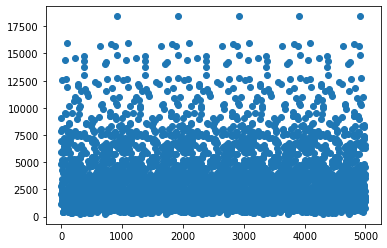

In [17]:
# finding outliers
import matplotlib.pyplot as plt
plt.scatter(data.index, data['Credit_Amount'])
plt.show()

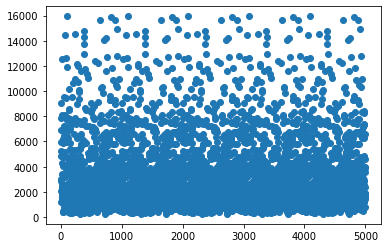

In [21]:
# removing the 5 outer most points

li = list(data['Credit_Amount'].sort_values()[-5:].index)
data['Credit_Amount'][li]=int(data.drop(li)['Credit_Amount'].mean())
plt.scatter(data.index, data['Credit_Amount'])

In [22]:
list(data.columns)

['Status_Checking_Acc',
 'Duration_in_Months',
 'Credit_History',
 'Purposre_Credit_Taken',
 'Credit_Amount',
 'Savings_Acc',
 'Years_At_Present_Employment',
 'Inst_Rt_Income',
 'Marital_Status_Gender',
 'Other_Debtors_Guarantors',
 'Current_Address_Yrs',
 'Property',
 'Age',
 'Other_Inst_Plans',
 'Housing',
 'Num_CC',
 'Job',
 'Dependents',
 'Telephone',
 'Foreign_Worker',
 'Default_On_Payment']

In [25]:
# Feature selection
x = data.iloc[:,:-1]
y = data.loc[:,'Default_On_Payment']

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = add_constant(x)
display(x.shape)

(5000, 21)

In [29]:
pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns).sort_values()

Other_Inst_Plans                1.052666
Marital_Status_Gender           1.067881
Other_Debtors_Guarantors        1.072735
Purposre_Credit_Taken           1.072977
Foreign_Worker                  1.078167
Dependents                      1.083040
Savings_Acc                     1.100208
Status_Checking_Acc             1.139096
Current_Address_Yrs             1.184206
Years_At_Present_Employment     1.196142
Telephone                       1.272943
Inst_Rt_Income                  1.302146
Num_CC                          1.304571
Age                             1.305332
Housing                         1.307878
Job                             1.331433
Credit_History                  1.357396
Property                        1.396762
Duration_in_Months              1.925800
Credit_Amount                   2.228846
const                          58.892670
dtype: float64

In [31]:
# Significancy (find p-value) using chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

significance = pd.Series(dtype=float)
for i in x.columns:
    dfobserved = pd.crosstab(x[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfobserved.values)
    significance[i]=p
significance.sort_values()

Credit_Amount                   0.000000e+00
Status_Checking_Acc            4.303013e-133
Credit_History                  1.873780e-65
Duration_in_Months              1.429318e-61
Savings_Acc                     2.005236e-37
Age                             1.227006e-33
Purposre_Credit_Taken           3.985377e-32
Property                        1.702444e-26
Housing                         6.229983e-21
Years_At_Present_Employment     5.621205e-19
Other_Inst_Plans                5.957742e-15
Marital_Status_Gender           6.541125e-10
Foreign_Worker                  1.216850e-08
Other_Debtors_Guarantors        5.880412e-08
Inst_Rt_Income                  2.214123e-06
Num_CC                          5.498509e-03
Telephone                       1.541937e-02
Job                             2.144243e-02
Current_Address_Yrs             3.772547e-01
Dependents                      9.167256e-01
const                           1.000000e+00
dtype: float64

In [38]:
# confidence score %

import scipy.stats as stats
from scipy.stats import chi2_contingency

significance = pd.Series(dtype=float)

for i in x.columns:
    dfobserved = pd.crosstab(x[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfobserved.values)
#     print(,'\t', p)
    significance[i] = (1-p)*100

significance.sort_values()

const                            0.000000
Dependents                       8.327441
Current_Address_Yrs             62.274532
Job                             97.855757
Telephone                       98.458063
Num_CC                          99.450149
Inst_Rt_Income                  99.999779
Other_Debtors_Guarantors        99.999994
Foreign_Worker                  99.999999
Marital_Status_Gender          100.000000
Other_Inst_Plans               100.000000
Savings_Acc                    100.000000
Credit_Amount                  100.000000
Purposre_Credit_Taken          100.000000
Property                       100.000000
Age                            100.000000
Housing                        100.000000
Credit_History                 100.000000
Duration_in_Months             100.000000
Status_Checking_Acc            100.000000
Years_At_Present_Employment    100.000000
dtype: float64

In [39]:
# age and credit amount is a continous variable. we will check anova for this
import scipy.stats as stats
stats.f_oneway(x['Credit_Amount'],y)

F_onewayResult(statistic=6855.109699626198, pvalue=0.0)

In [40]:
stats.f_oneway(x['Age'],y)

F_onewayResult(statistic=47964.48534645687, pvalue=0.0)

In [45]:
# Splitting data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.5, random_state=4589)

In [46]:
x_train.shape

(2500, 21)

In [47]:
# modeling
model = LogisticRegression()
model.fit(x_train, y_train)

/home/vikas/anaconda3/envs/techstack/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()